In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# 加载波士顿房价数据集
boston = load_boston()
X = boston.data
y = boston.target

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 将数据转换为PyTorch张量
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [3]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return self.linear(x)

# 初始化模型
input_dim = X_train.shape[1]
model = LinearRegression(input_dim)

In [4]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # 前向传播
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # 反向传播和优化
    loss.backward()
    optimizer.step()
    
    # 记录损失
    train_losses.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 415.1530
Epoch [20/100], Loss: 281.9071
Epoch [30/100], Loss: 195.3521
Epoch [40/100], Loss: 137.9470
Epoch [50/100], Loss: 99.7421
Epoch [60/100], Loss: 74.2785
Epoch [70/100], Loss: 57.2851
Epoch [80/100], Loss: 45.9283
Epoch [90/100], Loss: 38.3259
Epoch [100/100], Loss: 33.2267


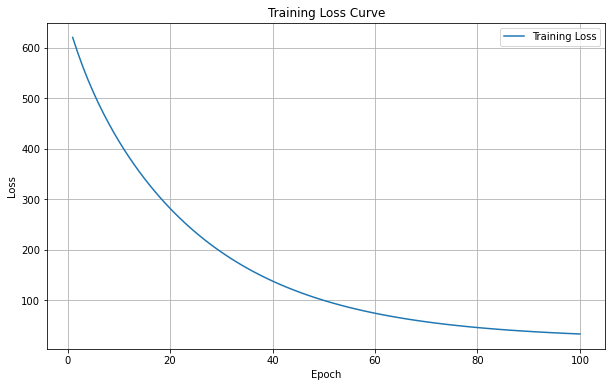

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()